In [1]:
#!pip install researchpy

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
# Loading `bike_sharing_data_processed.csv` dataset
df = pd.read_csv('bike_sharing_data_processed.csv')
df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


For Two Way ANOVA we will work with two categorical data, **'Weather Situation'** and **'Season'**

In [19]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [20]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

#### Summarization without researchpy library

In [21]:
df.groupby('weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


#### Summarization of weather situtation with researchpy library

In [24]:
rp.summary_cont(df.groupby(['weathersit']))['cnt']

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


<Axes: title={'center': 'cnt'}, xlabel='weathersit'>

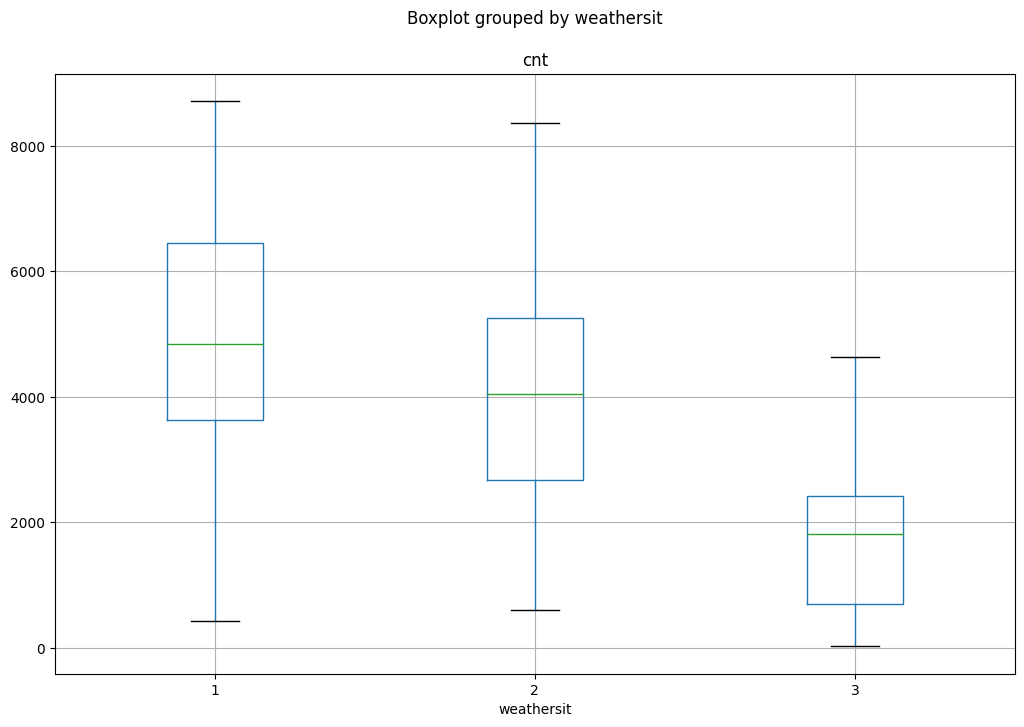

In [25]:
df.boxplot(column=['cnt'], by='weathersit', figsize=(12, 8))

#### Summarization of season with and without researchpy library

In [27]:
df.groupby('season')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,181.0,2604.132597,1399.942119,431.0,1538.0,2209.0,3456.00,7836.0
2,184.0,4992.331522,1695.977235,795.0,4003.0,4941.5,6377.00,8362.0
3,188.0,5644.303191,1459.800381,1115.0,4586.5,5353.5,6929.25,8714.0
4,178.0,4728.162921,1699.615261,22.0,3615.5,4634.5,5624.50,8555.0


In [28]:
rp.summary_cont(df.groupby(['season']))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


<Axes: title={'center': 'cnt'}, xlabel='season'>

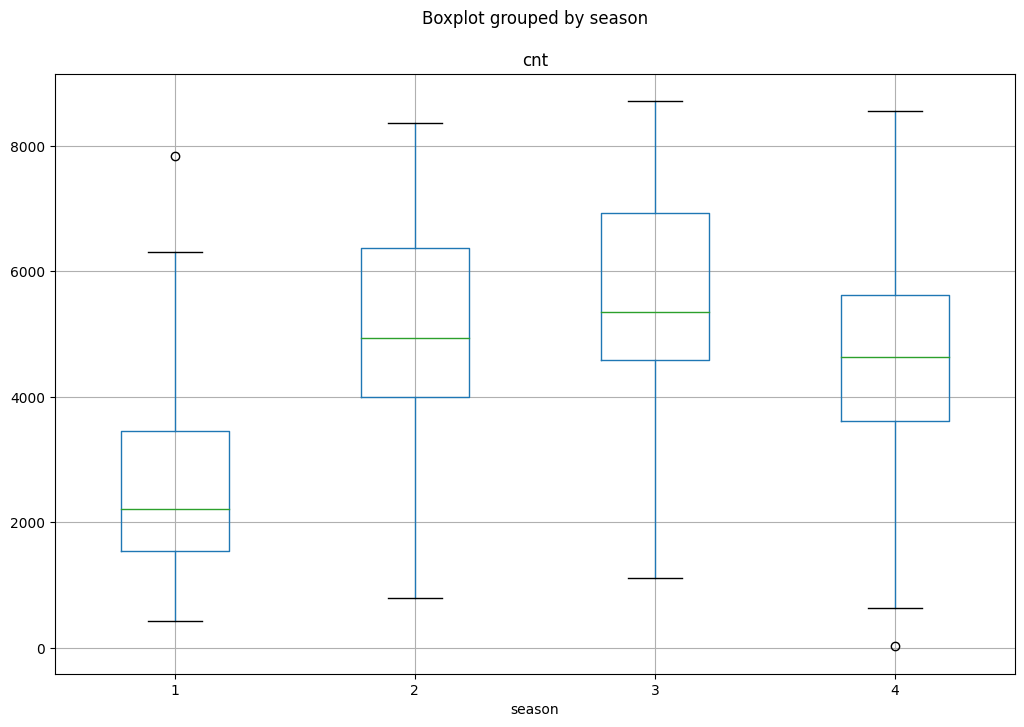

In [29]:
df.boxplot(column=['cnt'], by='season', figsize=(12, 8))

### Checking if there is a linear relationship between the number of bikes shared an weather situation using **'Linear Regression'**

In [30]:
model = ols('cnt ~ C(weathersit)', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.11e-17
Time:                        18:34:11   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

- The value of R-Squared shows how well the linear model fit the underlying data. Here, it's clear that it does not fit the model well.
- F-Statistic determines whether this test is significant or not on the corresponding p-value. So under 5% threshold we know this test is significant.
- The t  statistic tells whether the regression variable is significant or not.
    - Null hypothesis = the coefficient should be equal to zero, i.e., the variable is not significant
    - Where p-value is 0, we can reject the null hypothesis
    
    


### Build regression model of cnt according to season

In [32]:
model = ols('cnt ~ C(season)', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           6.72e-67
Time:                        18:35:09   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

- The F-statistic and the t-statistic shows that regression is significant.
- The t-statistic for individual regression variable also shows that the co-efficients for these variables are also significant


### Regression analysis considering both weather situations and seasons without considering the interaction between between them

In [33]:
model = ols('cnt ~ C(weathersit) + C(season)', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.13e-87
Time:                        18:35:32   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116

The value of R-square says the regression is significant.

### Performing ANOVA analysis on **'weathersit'** and **'season'**

In [34]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,63.717757,3.218999e-26
C(season),3.0,9.224636e+08,3.074879e+08,144.250530,2.702818e-73
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


- The differences in the means between these categories are significant
- A p-value which is very close zero indicates that the differences in the means between the different categories of weather situation is significant
- The same applies for seasons
- This shows that season and weather situation both impact the number of bikes rented.


### Regression analysis considering both weather situations and seasons considering the interaction between between them

In [36]:
model = ols('cnt ~ C(weathersit) * C(season)', df).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.25e-85
Time:                        18:36:09   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

- The value of R and F-statistic shows that the regression is significant
- We now have individual weather situations and invidual seasons

### Show Anova table for the model using `anova_lm`

In [37]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN


Here the Two way ANOVA also clarifies that the interaction between Season category and Weather situation is significant